# Objective 

Event modeling using 5000 events (100 per bin, 50 bins)

# Experiment description

* Chosen metric details (See: calib_metriceval_v2.ipynb): **exp7 - Daily KGE, 1 day smoothing, kge_a_alpha = 1.**
* 4 model runs
    * FUSE-PRMS
    * FUSE-HECHMS
    * FUSE-VIC
    * FUSE-SACSMA
    

In [1]:
import glob, os
import xarray as xr
import math
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# User-provided

In [2]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid")
sns.set_context('poster')

drydir = '/glade/work/manab/ff/eventmodeling/output/dry/'
pastprecipdir = '/glade/work/manab/ff/eventmodeling/output/past_precip'

# List of all FUSE output files

In [3]:
#prmslist =glob.glob(os.path.join(drydir, '**/*_111_runs_best*.nc'), recursive=True)
hechmslist1 =glob.glob(os.path.join(drydir, '**/*_222_runs_best*.nc'), recursive=True)
viclist1 =glob.glob(os.path.join(drydir, '**/*_333_runs_best*.nc'), recursive=True)
sacsmalist1 =glob.glob(os.path.join(drydir, '**/*_444_runs_best*.nc'), recursive=True)

#prmslist =glob.glob(os.path.join(pastprecipdir, '**/*_111_runs_best*.nc'), recursive=True)
hechmslist2 =glob.glob(os.path.join(pastprecipdir, '**/*_222_runs_best*.nc'), recursive=True)
viclist2 =glob.glob(os.path.join(pastprecipdir, '**/*_333_runs_best*.nc'), recursive=True)
sacsmalist2 =glob.glob(os.path.join(pastprecipdir, '**/*_444_runs_best*.nc'), recursive=True)

 # DRY 

In [4]:
def maxminFlowVol(nclist, ncvar, nday):
    '''Find the global maximum and minimum n-day flow volume from a list
    
    nclist: List of netCDF files
    ncvar: Variable for which netCDF
    nday: Number of days from the beginning for totaling
    return: Max and min value
    '''
    flowtotals = []
    minlist = []
    print('Calculating max/min from flow volumes of ' + str(len(nclist)) + ' netCDF files')
    for index, value in enumerate(nclist):
        flowtotaltemp = sum(xr.open_dataset(value)[ncvar][:nday]).values.flatten()
        flowtotals.append(flowtotaltemp)
        
    return(max(flowtotals), min(flowtotals))

In [5]:
#NATURAL LOGARITHM and Number of days of flow totals

hechmsmax1_1d, hechmsmin1_1d = np.log(maxminFlowVol(hechmslist1, 'q_routed', 1))  
vicmax1_1d, vicmin1_1d = np.log(maxminFlowVol(viclist1, 'q_routed', 1))  
sacsmamax1_1d, sacsmamin1_1d = np.log(maxminFlowVol(sacsmalist1, 'q_routed', 1))  

hechmsmax1_3d, hechmsmin1_3d = np.log(maxminFlowVol(hechmslist1, 'q_routed', 3)) 
vicmax1_3d, vicmin1_3d = np.log(maxminFlowVol(viclist1, 'q_routed', 3))  
sacsmamax1_3d, sacsmamin1_3d = np.log(maxminFlowVol(sacsmalist1, 'q_routed', 3))  

hechmsmax1_5d, hechmsmin1_5d = np.log(maxminFlowVol(hechmslist1, 'q_routed', 5)) 
vicmax1_5d, vicmin1_5d = np.log(maxminFlowVol(viclist1, 'q_routed', 5))  
sacsmamax1_5d, sacsmamin1_5d = np.log(maxminFlowVol(sacsmalist1, 'q_routed', 5))  

hechmsmax1_7d, hechmsmin1_7d = np.log(maxminFlowVol(hechmslist1, 'q_routed', 7)) 
vicmax1_7d, vicmin1_7d = np.log(maxminFlowVol(viclist1, 'q_routed', 7))  
sacsmamax1_7d, sacsmamin1_7d = np.log(maxminFlowVol(sacsmalist1, 'q_routed', 7))  

hechmsmax1_14d, hechmsmin1_14d = np.log(maxminFlowVol(hechmslist1, 'q_routed', 14)) 
vicmax1_14d, vicmin1_14d = np.log(maxminFlowVol(viclist1, 'q_routed', 14))  
sacsmamax1_14d, sacsmamin1_14d = np.log(maxminFlowVol(sacsmalist1, 'q_routed', 14))  

Calculating max/min from flow volumes of 5000 netCDF files
Calculating max/min from flow volumes of 5000 netCDF files
Calculating max/min from flow volumes of 5000 netCDF files
Calculating max/min from flow volumes of 5000 netCDF files
Calculating max/min from flow volumes of 5000 netCDF files
Calculating max/min from flow volumes of 5000 netCDF files
Calculating max/min from flow volumes of 5000 netCDF files
Calculating max/min from flow volumes of 5000 netCDF files
Calculating max/min from flow volumes of 5000 netCDF files
Calculating max/min from flow volumes of 5000 netCDF files
Calculating max/min from flow volumes of 5000 netCDF files
Calculating max/min from flow volumes of 5000 netCDF files
Calculating max/min from flow volumes of 5000 netCDF files
Calculating max/min from flow volumes of 5000 netCDF files
Calculating max/min from flow volumes of 5000 netCDF files


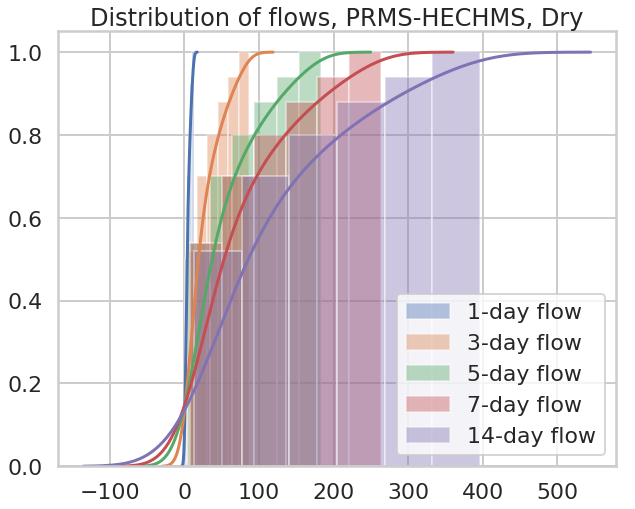

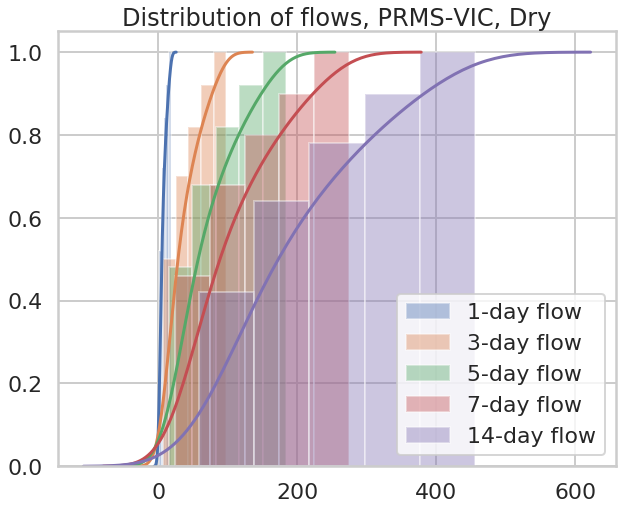

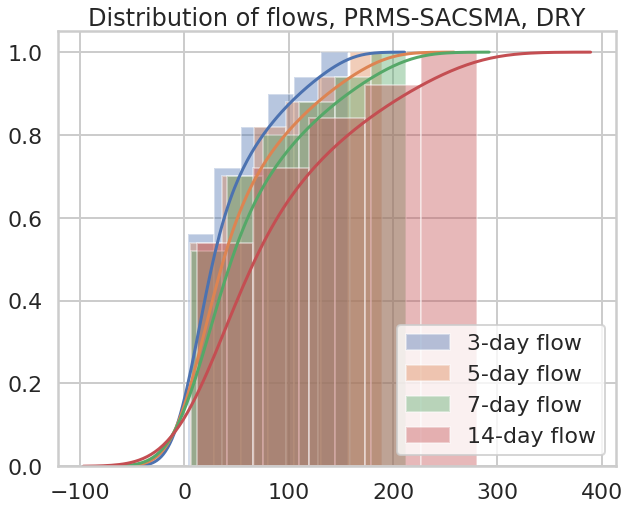

In [7]:
sns.distplot(np.exp(np.linspace(hechmsmax1_1d, hechmsmin1_1d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="1-day flow")
sns.distplot(np.exp(np.linspace(hechmsmax1_3d, hechmsmin1_3d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="3-day flow")
sns.distplot(np.exp(np.linspace(hechmsmax1_5d, hechmsmin1_5d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="5-day flow")
sns.distplot(np.exp(np.linspace(hechmsmax1_7d, hechmsmin1_7d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="7-day flow")
sns.distplot(np.exp(np.linspace(hechmsmax1_14d, hechmsmin1_14d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="14-day flow")
plt.title("Distribution of flows, PRMS-HECHMS, Dry")
plt.legend()
plt.show()

sns.distplot(np.exp(np.linspace(vicmax1_1d, vicmin1_1d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="1-day flow")
sns.distplot(np.exp(np.linspace(vicmax1_3d, vicmin1_3d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="3-day flow")
sns.distplot(np.exp(np.linspace(vicmax1_5d, vicmin1_5d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="5-day flow")
sns.distplot(np.exp(np.linspace(vicmax1_7d, vicmin1_7d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="7-day flow")
sns.distplot(np.exp(np.linspace(vicmax1_14d, vicmin1_14d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="14-day flow")
plt.title("Distribution of flows, PRMS-VIC, Dry")
plt.legend()
plt.show()

sns.distplot(np.exp(np.linspace(sacsmamax1_3d, sacsmamin1_3d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="3-day flow")
sns.distplot(np.exp(np.linspace(sacsmamax1_5d, sacsmamin1_5d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="5-day flow")
sns.distplot(np.exp(np.linspace(sacsmamax1_7d, sacsmamin1_7d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="7-day flow")
sns.distplot(np.exp(np.linspace(sacsmamax1_14d, sacsmamin1_14d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="14-day flow")
plt.title("Distribution of flows, PRMS-SACSMA, DRY")
plt.legend()
plt.show()

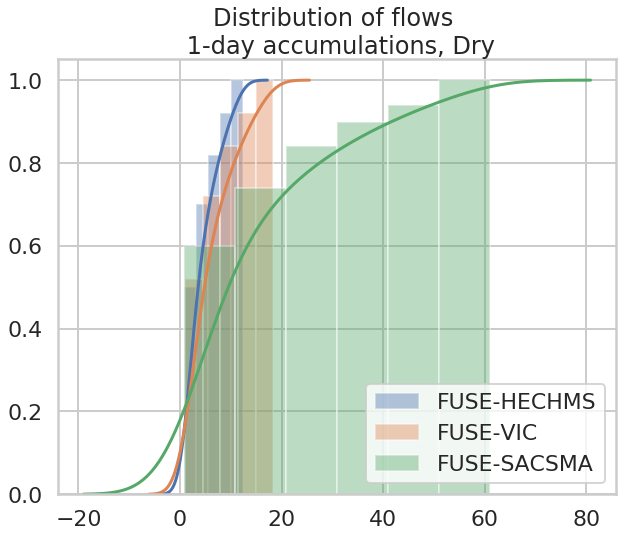

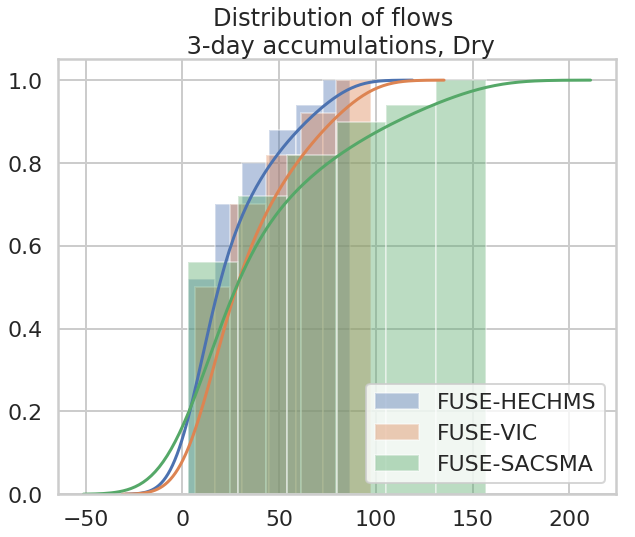

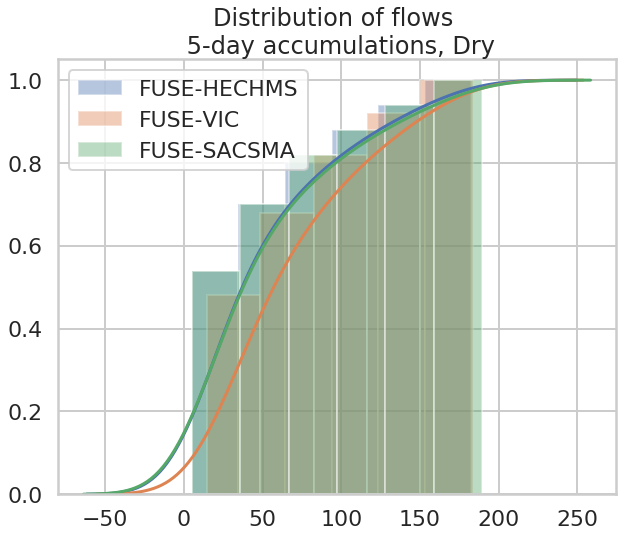

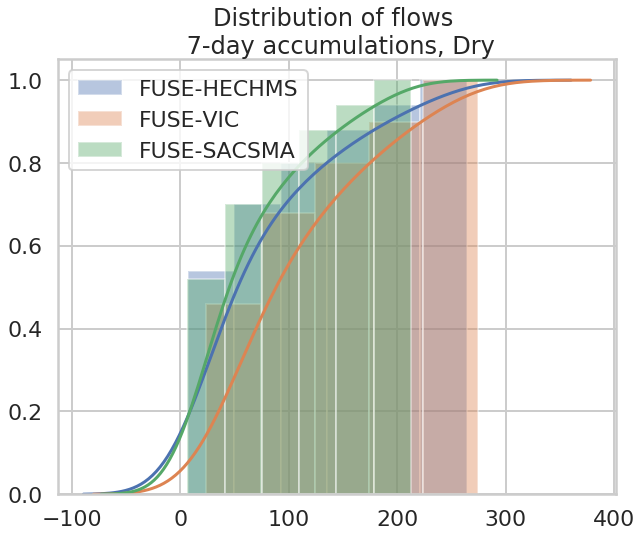

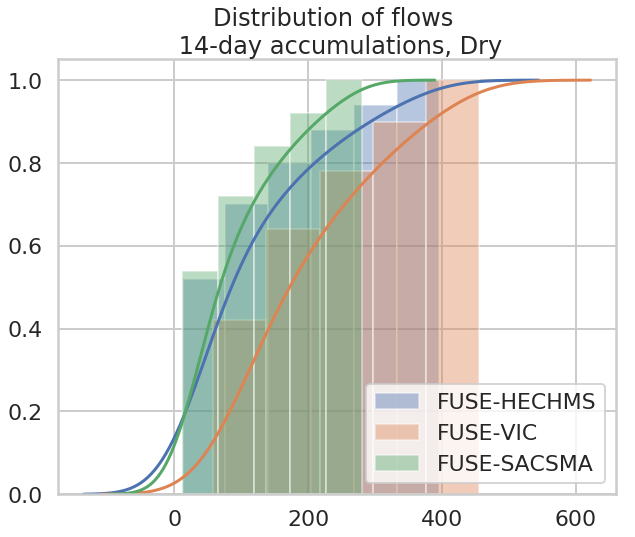

In [8]:
sns.distplot(np.exp(np.linspace(hechmsmax1_1d, hechmsmin1_1d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-HECHMS")
sns.distplot(np.exp(np.linspace(vicmax1_1d, vicmin1_1d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-VIC")
sns.distplot(np.exp(np.linspace(sacsmamax1_1d, sacsmamin1_1d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-SACSMA")
plt.title("Distribution of flows \n 1-day accumulations, Dry")
plt.legend()
plt.show()

sns.distplot(np.exp(np.linspace(hechmsmax1_3d, hechmsmin1_3d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-HECHMS")
sns.distplot(np.exp(np.linspace(vicmax1_3d, vicmin1_3d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-VIC")
sns.distplot(np.exp(np.linspace(sacsmamax1_3d, sacsmamin1_3d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-SACSMA")
plt.title("Distribution of flows \n 3-day accumulations, Dry")
plt.legend()
plt.show()

sns.distplot(np.exp(np.linspace(hechmsmax1_5d, hechmsmin1_5d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-HECHMS")
sns.distplot(np.exp(np.linspace(vicmax1_5d, vicmin1_5d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-VIC")
sns.distplot(np.exp(np.linspace(sacsmamax1_5d, sacsmamin1_5d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-SACSMA")
plt.title("Distribution of flows \n 5-day accumulations, Dry")
plt.legend()
plt.show()

sns.distplot(np.exp(np.linspace(hechmsmax1_7d, hechmsmin1_7d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-HECHMS")
sns.distplot(np.exp(np.linspace(vicmax1_7d, vicmin1_7d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-VIC")
sns.distplot(np.exp(np.linspace(sacsmamax1_7d, sacsmamin1_7d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-SACSMA")
plt.title("Distribution of flows \n 7-day accumulations, Dry")
plt.legend()
plt.show()

sns.distplot(np.exp(np.linspace(hechmsmax1_14d, hechmsmin1_14d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-HECHMS")
sns.distplot(np.exp(np.linspace(vicmax1_14d, vicmin1_14d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-VIC")
sns.distplot(np.exp(np.linspace(sacsmamax1_14d, sacsmamin1_14d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-SACSMA")
plt.title("Distribution of flows \n 14-day accumulations, Dry")
plt.legend()
plt.show()



# PAST PRECIP

In [ ]:
#NATURAL LOGARITHM and Number of days of flow totals

hechmsmax2_1d, hechmsmin2_1d = np.log(maxminFlowVol(hechmslist2, 'q_routed', 1))
vicmax2_1d, vicmin2_1d = np.log(maxminFlowVol(viclist2, 'q_routed', 1))
sacsmamax2_1d, sacsmamin2_1d = np.log(maxminFlowVol(sacsmalist2, 'q_routed', 1))

hechmsmax2_3d, hechmsmin2_3d = np.log(maxminFlowVol(hechmslist2, 'q_routed', 3))
vicmax2_3d, vicmin2_3d = np.log(maxminFlowVol(viclist2, 'q_routed', 3))
sacsmamax2_3d, sacsmamin2_3d = np.log(maxminFlowVol(sacsmalist2, 'q_routed', 3))

hechmsmax2_5d, hechmsmin2_5d = np.log(maxminFlowVol(hechmslist2, 'q_routed', 5))
vicmax2_5d, vicmin2_5d = np.log(maxminFlowVol(viclist2, 'q_routed', 5))
sacsmamax2_5d, sacsmamin2_5d = np.log(maxminFlowVol(sacsmalist2, 'q_routed', 5))

hechmsmax2_7d, hechmsmin2_7d = np.log(maxminFlowVol(hechmslist2, 'q_routed', 7))
vicmax2_7d, vicmin2_7d = np.log(maxminFlowVol(viclist2, 'q_routed', 7))
sacsmamax2_7d, sacsmamin2_7d = np.log(maxminFlowVol(sacsmalist2, 'q_routed', 7))

hechmsmax2_14d, hechmsmin2_14d = np.log(maxminFlowVol(hechmslist2, 'q_routed', 14))
vicmax2_14d, vicmin2_14d = np.log(maxminFlowVol(viclist2, 'q_routed', 14))
sacsmamax2_14d, sacsmamin2_14d = np.log(maxminFlowVol(sacsmalist2, 'q_routed', 14))

In [ ]:
sns.distplot(np.exp(np.linspace(hechmsmax2_1d, hechmsmin2_1d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="1-day flow")
sns.distplot(np.exp(np.linspace(hechmsmax2_3d, hechmsmin2_3d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="3-day flow")
sns.distplot(np.exp(np.linspace(hechmsmax2_5d, hechmsmin2_5d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="5-day flow")
sns.distplot(np.exp(np.linspace(hechmsmax2_7d, hechmsmin2_7d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="7-day flow")
sns.distplot(np.exp(np.linspace(hechmsmax2_14d, hechmsmin2_14d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="14-day flow")
plt.title("Distribution of flows, PRMS-HECHMS, Past precip")
plt.legend()
plt.show()

sns.distplot(np.exp(np.linspace(vicmax2_1d, vicmin2_1d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="1-day flow")
sns.distplot(np.exp(np.linspace(vicmax2_3d, vicmin2_3d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="3-day flow")
sns.distplot(np.exp(np.linspace(vicmax2_5d, vicmin2_5d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="5-day flow")
sns.distplot(np.exp(np.linspace(vicmax2_7d, vicmin2_7d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="7-day flow")
sns.distplot(np.exp(np.linspace(vicmax2_14d, vicmin2_14d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="14-day flow")
plt.title("Distribution of flows, PRMS-VIC, Past precip")
plt.legend()
plt.show()

sns.distplot(np.exp(np.linspace(sacsmamax2_3d, sacsmamin2_3d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="3-day flow")
sns.distplot(np.exp(np.linspace(sacsmamax2_5d, sacsmamin2_5d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="5-day flow")
sns.distplot(np.exp(np.linspace(sacsmamax2_7d, sacsmamin2_7d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="7-day flow")
sns.distplot(np.exp(np.linspace(sacsmamax2_14d, sacsmamin2_14d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="14-day flow")
plt.title("Distribution of flows, PRMS-SACSMA, Past precip")
plt.legend()
plt.show()

In [ ]:
sns.distplot(np.exp(np.linspace(hechmsmax2_1d, hechmsmin2_1d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-HECHMS")
sns.distplot(np.exp(np.linspace(vicmax2_1d, vicmin2_1d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-VIC")
sns.distplot(np.exp(np.linspace(sacsmamax2_1d, sacsmamin2_1d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-SACSMA")
plt.title("Distribution of flows \n 1-day accumulations, Past precip")
plt.legend()
plt.show()

sns.distplot(np.exp(np.linspace(hechmsmax2_3d, hechmsmin2_3d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-HECHMS")
sns.distplot(np.exp(np.linspace(vicmax2_3d, vicmin2_3d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-VIC")
sns.distplot(np.exp(np.linspace(sacsmamax2_3d, sacsmamin2_3d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-SACSMA")
plt.title("Distribution of flows \n 3-day accumulations, Past precip")
plt.legend()
plt.show()

sns.distplot(np.exp(np.linspace(hechmsmax2_5d, hechmsmin2_5d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-HECHMS")
sns.distplot(np.exp(np.linspace(vicmax2_5d, vicmin2_5d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-VIC")
sns.distplot(np.exp(np.linspace(sacsmamax2_5d, sacsmamin2_5d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-SACSMA")
plt.title("Distribution of flows \n 5-day accumulations, Past precip")
plt.legend()
plt.show()

sns.distplot(np.exp(np.linspace(hechmsmax2_7d, hechmsmin2_7d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-HECHMS")
sns.distplot(np.exp(np.linspace(vicmax2_7d, vicmin2_7d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-VIC")
sns.distplot(np.exp(np.linspace(sacsmamax2_7d, sacsmamin2_7d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-SACSMA")
plt.title("Distribution of flows \n 7-day accumulations, Past precip")
plt.legend()
plt.show()

sns.distplot(np.exp(np.linspace(hechmsmax2_14d, hechmsmin2_14d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-HECHMS")
sns.distplot(np.exp(np.linspace(vicmax2_14d, vicmin2_14d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-VIC")
sns.distplot(np.exp(np.linspace(sacsmamax2_14d, sacsmamin2_14d, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-SACSMA")
plt.title("Distribution of flows \n 14-day accumulations, Past precip")
plt.legend()
plt.show()

# Others

In [ ]:
flows = {}
flows['hechmsmax1'] = hechmsmax1
flows['hechmsmin1'] = hechmsmin1
flows['vicmax1'] = vicmax1
flows['vicmin1'] = vicmin1
flows['sacsmamax1'] = sacsmamax1
flows['sacsmamin1'] = sacsmamin1

print('\n RANGE of values in natural log scale')
for x in flows:
    print (x,':',flows[x])
    
print('\n RANGE of values in normal scale')
for x in flows:
    print (x,':',np.exp(flows[x]))